In [169]:
import pandas as pd
import numpy as np
df_train = pd.read_csv(".\\ml-100k_u1\\u1.base",delimiter='\t',names=['user_id','item_id','rating','timestamp'])


df_for_histogram = df_train.groupby('item_id',as_index=False)['rating'].mean()



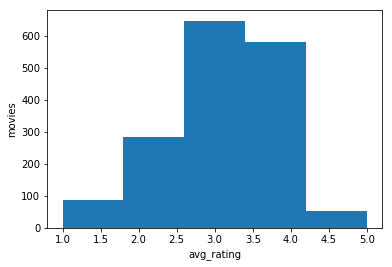

,item_id,rating
1181,1189,5.0
1620,1653,5.0
1566,1599,5.0


In [172]:
import matplotlib.pyplot as plt



_ = plt.hist(df_for_histogram['rating'],bins=5)
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

df_for_histogram.sort_values(by='rating',ascending=False).head(3)

gender          F         M
item_id                    
1        3.800000  3.925795
2        3.200000  3.177778
3        2.538462  3.096774
4        3.315789  3.586466
5        3.882353  3.115385
6        3.500000  3.375000
7        3.593750  3.851852
8        4.018519  3.983193
9        3.840580  3.830508
10       3.733333  3.913793
11       3.725000  3.883871
12       4.285714  4.426036
13       3.189189  3.494845
14       3.785714  3.948980
15       3.960000  3.718750
16       3.250000  3.304348
17       2.888889  3.222222
18       3.000000  2.833333
19       4.375000  3.714286
20       3.750000  3.351351
21       3.300000  2.645833
22       4.085106  4.147541
23       4.130435  4.067164
24       3.300000  3.413793
25       3.657143  3.360248
26       3.150000  3.540541
27       2.875000  3.238095
28       4.019608  3.871345
29       3.235294  2.564103
30       4.200000  4.040000
...           ...       ...
1653          NaN  5.000000
1654          NaN  1.000000
1655          NaN  2

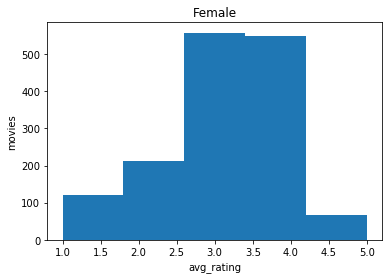

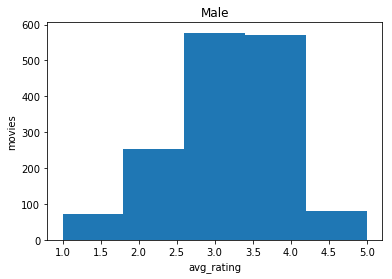

item_id
1594    5.0
1150    5.0
1301    5.0
Name: F, dtype: float64
item_id
1500    5.0
1189    5.0
1656    5.0
Name: M, dtype: float64
gender          F         M      diff
item_id                              
1        3.800000  3.925795  0.125795
2        3.200000  3.177778  0.022222
3        2.538462  3.096774  0.558313
4        3.315789  3.586466  0.270677
5        3.882353  3.115385  0.766968
6        3.500000  3.375000  0.125000
7        3.593750  3.851852  0.258102
8        4.018519  3.983193  0.035325
9        3.840580  3.830508  0.010071
10       3.733333  3.913793  0.180460
11       3.725000  3.883871  0.158871
12       4.285714  4.426036  0.140321
13       3.189189  3.494845  0.305656
14       3.785714  3.948980  0.163265
15       3.960000  3.718750  0.241250
16       3.250000  3.304348  0.054348
17       2.888889  3.222222  0.333333
18       3.000000  2.833333  0.166667
19       4.375000  3.714286  0.660714
20       3.750000  3.351351  0.398649
21       3.300000  2.645833 

In [145]:

df_train_users = pd.read_csv(".\\ml-100k_u1\\u.user",delimiter='|',names=['user_id','age','gender','occupation','zip_code'])

df_train_users_merges = pd.merge(df_train,df_train_users)



mean_ratings = df_train_users_merges.pivot_table('rating',index=['item_id'],columns='gender',aggfunc='mean')

print mean_ratings

_ = plt.hist(mean_ratings['F'].dropna(),bins=5)
_ = plt.title('Female')
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

_ = plt.hist(mean_ratings['M'].dropna(),bins=5)
_ = plt.title('Male')
_ = plt.xlabel('avg_rating')
_ = plt.ylabel('movies')
plt.show()

ratings_active = mean_ratings;

print mean_ratings.sort_values(by='F',ascending=False)['F'].head(3)
print mean_ratings.sort_values(by='M',ascending=False)['M'].head(3)

ratings_active = ratings_active.sort_index(ascending=True)
ratings_active['diff'] = abs((ratings_active['F']-ratings_active['M']))

print ratings_active.dropna()


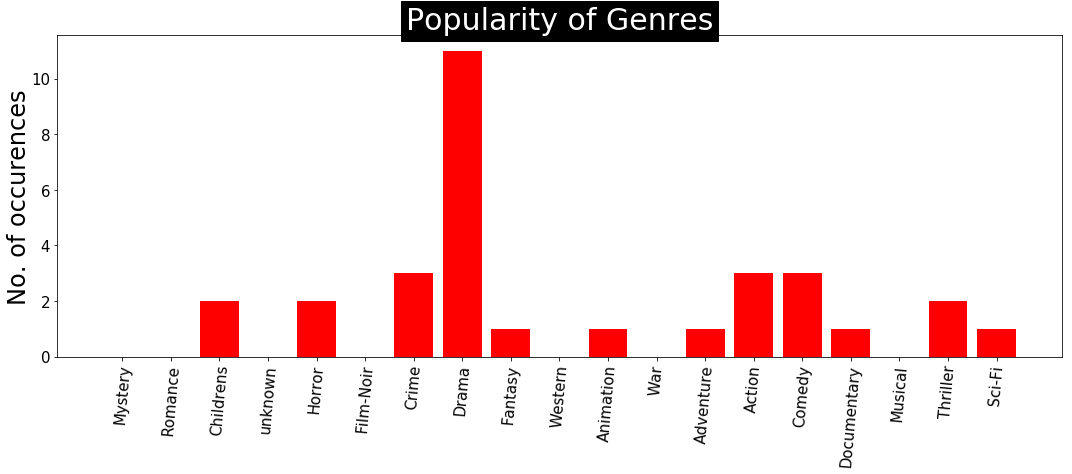

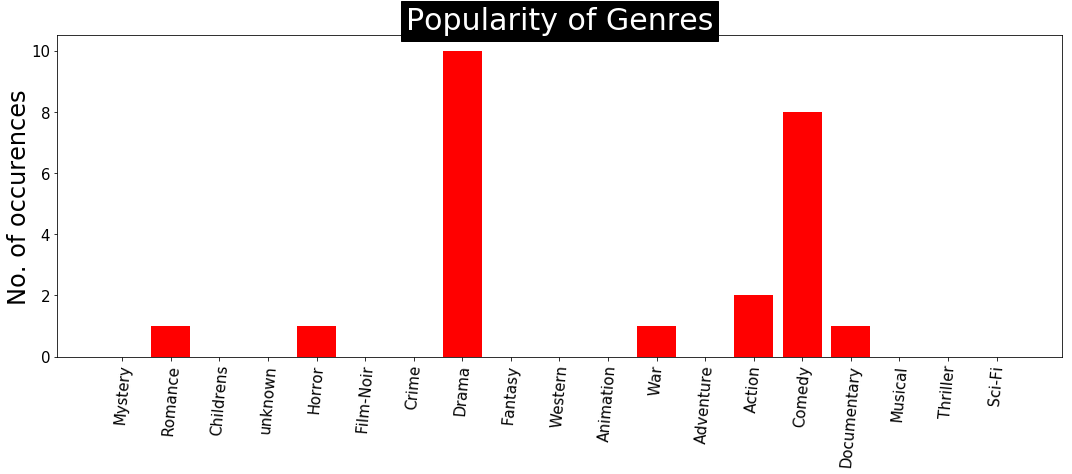

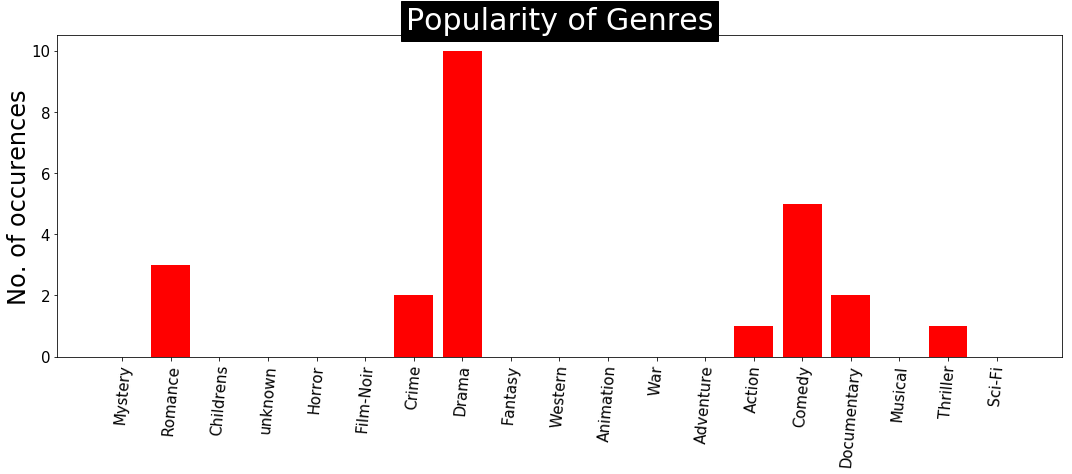

In [278]:
df_train_items = pd.read_csv(".\\ml-100k_u1\\u.item",delimiter='|',names=['item_id','movie title','release date','video release date','IMDb URL'
          ,'unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western'])

genres = ['unknown','Action','Adventure','Animation','Childrens','Comedy',
          'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
        'Thriller','War','Western']



df_user_rating_top_buttom = df_for_histogram.sort_values(by='rating',ascending=False).head(10)
df_user_rating_top_buttom = df_user_rating_top_buttom.append(df_for_histogram.sort_values(by='rating',ascending=False).tail(10))


df_train_users_items = pd.merge(df_user_rating_top_buttom,df_train_items)

genres_count = {}
for genre in genres:
    count = 0
    genre_movies = df_train_users_items[genre] == 1
    genres_count[genre] = df_train_users_items[genre_movies].shape[0]

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genres_count[i] for i in genres_count]
x_axis = [i for i in range(len(genres_count))]
x_label = [i for i in genres_count]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()


mean_ratings_top_buttom_female = mean_ratings.sort_values(by='F',ascending=False)['F'].head(10).append(mean_ratings.sort_values(by='F',ascending=False)['F'].dropna().tail(10))
mean_ratings_top_buttom_female = mean_ratings_top_buttom_female.to_frame().reset_index().drop(['F'],axis=1)

df_train_users_items_Female = pd.merge(mean_ratings_top_buttom_female,df_train_items)

genres_count = {}
for genre in genres:
    count = 0
    genre_movies = df_train_users_items_Female[genre] == 1
    genres_count[genre] = df_train_users_items_Female[genre_movies].shape[0]

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genres_count[i] for i in genres_count]
x_axis = [i for i in range(len(genres_count))]
x_label = [i for i in genres_count]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()

mean_ratings_top_buttom_male = mean_ratings.sort_values(by='M',ascending=False)['M'].head(10).append(mean_ratings.sort_values(by='M',ascending=False)['M'].dropna().tail(10))
mean_ratings_top_buttom_male = mean_ratings_top_buttom_male.to_frame().reset_index().drop(['M'],axis=1)

df_train_users_items_Male = pd.merge(mean_ratings_top_buttom_male,df_train_items)

genres_count = {}
for genre in genres:
    count = 0
    genre_movies = df_train_users_items_Male[genre] == 1
    genres_count[genre] = df_train_users_items_Male[genre_movies].shape[0]

fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [genres_count[i] for i in genres_count]
x_axis = [i for i in range(len(genres_count))]
x_label = [i for i in genres_count]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center', color='r')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 30)
plt.show()